# Example with Copper Mountain Model M5065 Vector Network Analyzer
This notebook was adapted from `qcodes_contrib_drivers` for Copper Mountain M5180. 

In [ ]:
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    load_or_create_experiment,
    plot_by_id,
)
from qcodes.instrument_drivers.CopperMountain import CopperMountainM5065
from qcodes.station import Station

NoTagError: `git describe --long --dirty --always --tags '--match=v*'` could not find a tag


## Connecting to device

- Install connection software S2VN, download here: https://coppermountaintech.com/download-free-vna-software-and-documentation/
- Run the software and go to System > Misc Setup > Network Remote Control Settings and turn on HiSLIP Server

In [ ]:
vna = CopperMountainM5065(
    name="M5065",
    address="TCPIP0::localhost::hislip0::INSTR",
    # pyvisa_sim_file="CopperMountain_M5065.yaml",
)

Connected to: CMT M5065 (serial:23047001, firmware:25.3.1/2) in 0.20s


In [5]:
# Let's look at all parameters
vna.print_readable_snapshot(update=True)

M5065:
	parameter               value
--------------------------------------------------------------------------------
IDN                      :	{'vendor': 'CMT', 'model': 'M5065', 'serial': '230...
averages                 :	10 
averages_enabled         :	False 
averages_trigger_enabled :	False 
center                   :	3.2502e+09 (Hz)
clock_source             :	INT 
data_transfer_format     :	ASC 
electrical_delay         :	0 (s)
electrical_distance      :	0 (m)
if_bandwidth             :	10000 (Hz)
number_of_points         :	201 
number_of_traces         :	1 
output                   :	True 
point_check_sweep_first  :	True 
point_s11                :	Not available (('dB', 'rad'))
point_s11_iq             :	Not available (('V', 'V'))
point_s12                :	Not available (('dB', 'rad'))
point_s12_iq             :	Not available (('V', 'V'))
point_s21                :	Not available (('dB', 'rad'))
point_s21_iq             :	Not available (('V', 'V'))
point_s22                :	No

# Setup db and station for test measurement

In [6]:
# create an empty database based on the config file
qc.initialise_or_create_database_at("./test_copper_mountain.db")

In [7]:
exp = load_or_create_experiment(
    experiment_name="testing_coppermountain_driver", sample_name="band_pass_filter"
)

In [8]:
station = Station(vna)

## Measure a trace

In [9]:
vna.output("on")
vna.output()

True

Starting experimental run with id: 1. 


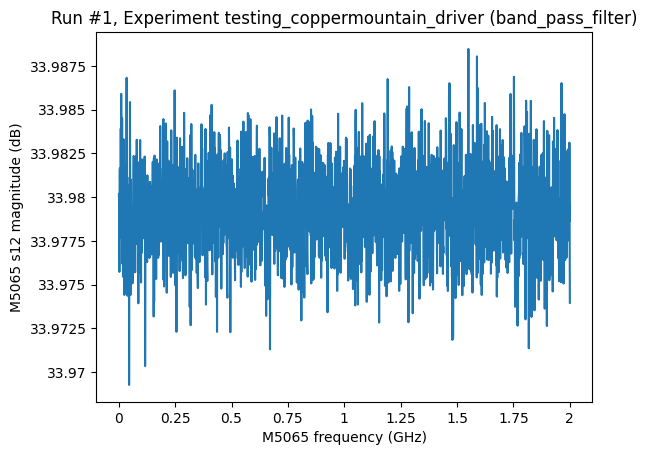

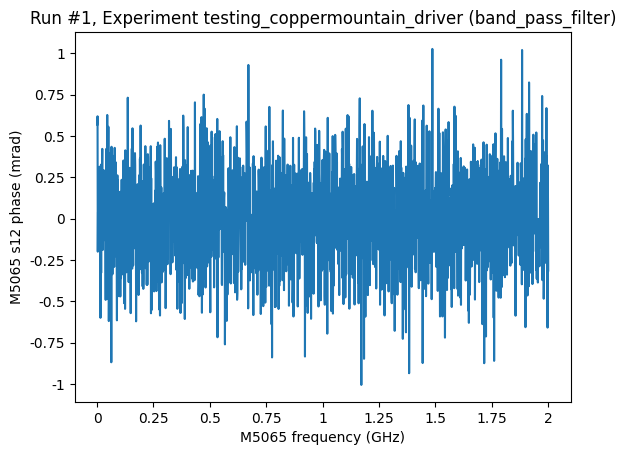

In [10]:
# define sweep parameters
vna.power(-20)
vna.start(1e6)
vna.stop(2e9)
vna.if_bandwidth(10e3)
vna.number_of_points(2001)
vna.averages(1)
# do measurement
meas = Measurement()
meas.register_parameter(vna.s12)
with meas.run() as datasaver:
    datasaver.add_result((vna.s12, vna.s12()))
ax, cbax = plot_by_id(datasaver.run_id)

In [11]:
# Similarly, other S-parameters can be queried
vna.s11()

(array([83.26122803, 80.75750049, 78.44940704, ..., -8.70525495,
        -7.39917296, -7.31888414], shape=(2001,)),
 array([2.12333968, 2.09746786, 2.31121919, ..., 1.87094291, 1.77600748,
        1.77330165], shape=(2001,)))

In [12]:
vna.s12()

(array([33.97829174, 33.97448428, 33.97957474, ..., 33.98113194,
        33.98184522, 33.98329268], shape=(2001,)),
 array([-0.00055221,  0.00063451,  0.0001414 , ..., -0.0005448 ,
         0.00014741,  0.00016589], shape=(2001,)))

In [13]:
vna.s21()

(array([33.98949561, 33.97715986, 33.97702461, ..., 33.98047712,
        33.97354075, 33.98591088], shape=(2001,)),
 array([-4.15942817e-04,  1.37116799e-04,  7.08505255e-05, ...,
        -7.18153217e-05, -2.72621708e-04,  6.30044960e-05], shape=(2001,)))

In [14]:
vna.s22()

(array([90.92783872, 82.50446303, 79.43818092, ..., -6.13772571,
        -5.2107447 , -4.70608778], shape=(2001,)),
 array([2.38511826, 2.1903169 , 2.36005996, ..., 7.72382128, 7.73495793,
        7.74917966], shape=(2001,)))

In [15]:
# or all S-parameters at once. Attention this is not a qcodes parameter
vna.get_s()

(array([1.0000000e+06, 1.9995000e+06, 2.9990000e+06, ..., 1.9980010e+09,
        1.9990005e+09, 2.0000000e+09], shape=(2001,)),
 array([84.47317501, 81.60269476, 78.16749988, ..., -8.67102405,
        -8.29143174, -6.9921363 ], shape=(2001,)),
 array([2.04646414, 2.34391646, 2.24344606, ..., 1.83101102, 1.81951768,
        1.73808504], shape=(2001,)),
 array([33.98352736, 33.98276445, 33.9834625 , ..., 33.9786286 ,
        33.97991238, 33.97934041], shape=(2001,)),
 array([-5.92542064e-04,  4.47036439e-04,  7.31798169e-05, ...,
        -8.57784213e-05,  4.57500660e-04, -2.98953941e-04], shape=(2001,)),
 array([33.97919244, 33.98117124, 33.97728688, ..., 33.98184053,
        33.97699258, 33.97804563], shape=(2001,)),
 array([ 3.04302885e-04,  1.87970552e-05, -4.08099008e-04, ...,
        -2.52719173e-04, -2.83636381e-04,  1.26210857e-04], shape=(2001,)),
 array([87.41800913, 82.54938771, 79.75318217, ..., -5.85512024,
        -5.84758912, -4.59886008], shape=(2001,)),
 array([2.47657479

# Look at the names and the labels of the Sxx parameters

In [16]:
vna.s11.labels

('M5065 s11 magnitude', 'M5065 s11 phase')

In [17]:
vna.s11.names

('M5065_s11_magnitude', 'M5065_s11_phase')

In [18]:
vna.s11.setpoint_labels

(('M5065 frequency',), ('M5065 frequency',))

In [19]:
vna.s11.setpoint_names

(('M5065_frequency',), ('M5065_frequency',))

### Close the Connection

In [20]:
vna.close()